In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tanh_func(delta_val):
    qRbmax = 0.0051
    K_MRb = 629.5
    return qRbmax * np.tanh(K_MRb * delta_val)

# Data
delta_MRb = np.linspace(-0.05, 0.05, 1000)
tanh_delta = [tanh_func(val) for val in delta_MRb]

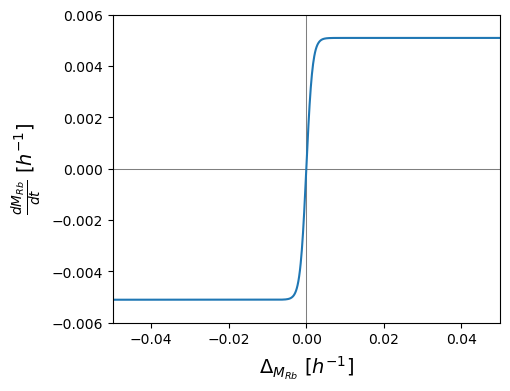

In [3]:
# Create figure and adjust size
plt.figure(figsize=(5, 4))

plt.axhline(color='tab:grey', lw=0.75)
plt.axvline(color='tab:grey', lw=0.75)
plt.plot(delta_MRb, tanh_delta, color='tab:blue', label=f'hyperbolic tangent')

plt.xlim(-0.05, 0.05)
plt.ylim(-0.006, 0.006)

plt.xlabel(fr'$\Delta_{{M_{{Rb}}}}$ $[h^{{-1}}]$', labelpad=5, fontsize=14)
plt.ylabel(fr'$\frac{{dM_{{Rb}}}}{{dt}}$ $[h^{{-1}}]$', labelpad=5, fontsize=14)

plt.savefig("tanh_MRb_curve.pdf", bbox_inches='tight')
plt.show()

In [47]:
def segmon_func(delta_val, my_val=0.5, M_Rb=0.075):
    qRbmax = 0.0057
    K_MRb = 0.0007
    qRbdeg = 0.051
    
    qRbsyn = 0.5 * (np.sqrt(delta_val**2) + delta_val)
    qRbdil = 1 - 1 / (1 + my_val)
    synmonod = qRbsyn / (qRbsyn + K_MRb)

    return qRbmax * synmonod - (qRbdeg + qRbdil) * M_Rb * (1 - synmonod)

# Data
delta_MRb = np.linspace(-0.05, 0.05, 1000)
segmon_delta = [segmon_func(val) for val in delta_MRb]

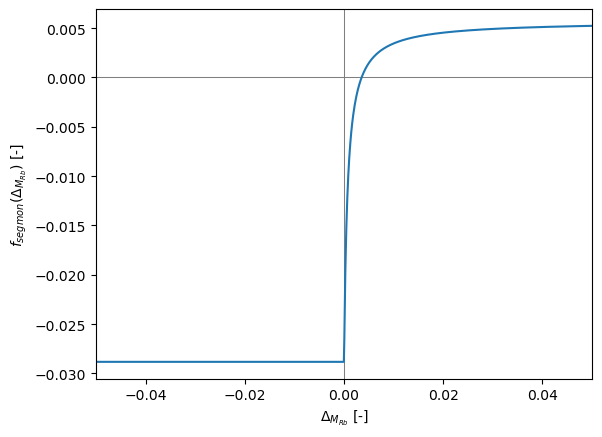

In [49]:
plt.axhline(color='tab:grey', lw=0.75)
plt.axvline(color='tab:grey', lw=0.75)
plt.plot(delta_MRb, segmon_delta, color='tab:blue', label=f'segmon')

plt.xlim(-0.05, 0.05)

plt.xlabel(fr'$\Delta_{{M_{{Rb}}}}$ [-]')
plt.ylabel(fr'$f_{{segmon}}(\Delta_{{M_{{Rb}}}})$ [-]')
plt.show()

In [50]:
def segmon_SS_func(delta_val, my_val=0.5):
    qRbmax = 0.0057
    K_MRb = 0.0007
    qRbdeg = 0.051
    M_Rb = 0.0964 * my_val + 0.0445
    
    qRbsyn = 0.5 * (np.sqrt(delta_val**2) + delta_val)
    qRbdil = 1 - 1 / (1 + my_val)
    synmonod = qRbsyn / (qRbsyn + K_MRb)

    return qRbmax * synmonod - (qRbdeg + qRbdil) * M_Rb * (1 - synmonod)

# Data
n_data = 30
delta_range = np.linspace(-0.05, 0.05, n_data)
my_range = np.linspace(0, 0.5, n_data)

data_dict = {'delta':[], 'my':[], 'f_segmon':[]}
for delta_value in delta_range:
    for my_value in my_range:
        f_segmon = segmon_SS_func(delta_value, my_value)
        data_dict['delta'].append(delta_value)
        data_dict['my'].append(my_value)
        data_dict['f_segmon'].append(f_segmon)
        
x_data = np.array(data_dict['delta']).reshape(n_data, n_data)
y_data = np.array(data_dict['my']).reshape(n_data, n_data)
z_data = np.array(data_dict['f_segmon']).reshape(n_data, n_data)

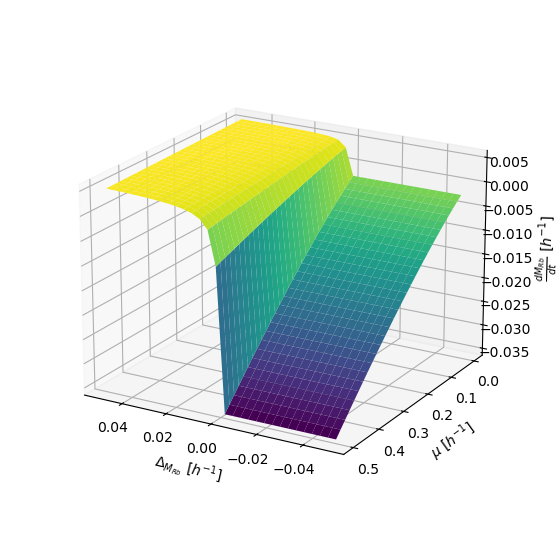

In [43]:
# Create a 3D plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_data, y_data, z_data, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel(fr'$\Delta_{{M_{{Rb}}}}$ $[h^{{-1}}]$')
ax.set_ylabel(fr'$\mu$ $[h^{{-1}}]$')
ax.set_zlabel(fr'$\frac{{dM_{{Rb}}}}{{dt}}$ $[h^{{-1}}]$')

# Change the direction of x and y axes
ax.view_init(elev=20, azim=120)

# Adjust label spacing
ax.xaxis.labelpad=8
ax.yaxis.labelpad=8
ax.zaxis.labelpad=12

ax.set_box_aspect(aspect=None, zoom=0.85)

# Show plot
plt.savefig("segmon_MRb_curve.pdf")
plt.show()

In [33]:
def segmon_SS_func(delta_val, my_val=0.5, M_Rb_val=0.075):
    qRbmax = 0.0057
    K_MRb = 0.0007
    qRbdeg = 0.051
    
    qRbsyn = 0.5 * (np.sqrt(delta_val**2) + delta_val)
    qRbdil = 1 - 1 / (1 + my_val)
    synmonod = qRbsyn / (qRbsyn + K_MRb)

    return qRbmax * synmonod - (qRbdeg + qRbdil) * M_Rb_val * (1 - synmonod)

# Data
n_data = 15
delta_range = np.linspace(-0.05, 0.05, n_data)
my_range = np.linspace(0, 0.5, n_data)
M_Rb_range = np.linspace(0, 0.25, n_data)

data_dict = {'delta':[], 'my':[], 'MRb':[], 'f_segmon':[]}
for delta_value in delta_range:
    for my_value in my_range:
        for MRb_value in M_Rb_range:
            f_segmon = segmon_SS_func(delta_value, my_value)
            data_dict['delta'].append(delta_value)
            data_dict['my'].append(my_value)
            data_dict['MRb'].append(MRb_value)
            data_dict['f_segmon'].append(f_segmon)

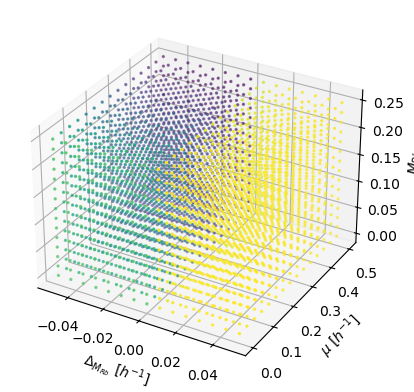

In [34]:
x_data = data_dict['delta']
y_data = data_dict['my']
z_data = data_dict['MRb']
c_data = data_dict['f_segmon']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(x_data, y_data, z_data, c=c_data, cmap='viridis', s=2)

# Set labels
ax.set_xlabel(fr'$\Delta_{{M_{{Rb}}}}$ $[h^{{-1}}]$')
ax.set_ylabel(fr'$\mu$ $[h^{{-1}}]$')
ax.set_zlabel(fr'$M_{{Rb}}$')
#ax.set_zlabel(fr'$f_{{segmon}}(\Delta_{{M_{{Rb}}}})$ $[h^{{-1}}]$')

# Show the plot
plt.show()

In [71]:
def HSLR_func(T_val, my_val=0.5, HSLR_val=1):
    qHSLRconst = 0.18
    qHSLRmax = 7
    qHSLRdeg = 0.051
    K_thresh = 0.5
    K_HSLR = 0.0007
    
    fsigT = 1/(0.31+np.exp(-2*(T_val-37.2)))
    
    synPO = 0
    synT = 0.5 * (np.sqrt((1 + fsigT - HSLR_val - K_thresh)**2) + 1 + fsigT - HSLR_val - K_thresh)
    synmonod = (synT + synPO) / (synT + synPO + K_HSLR)
    qHSLRdil = 1 - 1 / (1 + my_val)

    return qHSLRconst + qHSLRmax * synmonod - (qHSLRdil + qHSLRdeg) * HSLR_val

# Data
n_data = 50
Temp_range = np.linspace(30, 45, n_data)
my_range = np.linspace(0, 0.5, n_data)
HSLR_range = np.linspace(0.8, 4, n_data)

data_dict = {'Temp':[], 'my':[], 'f_HSLR':[]}
for T_value in Temp_range:
    for my_value in my_range:
        f_HSLR = HSLR_func(T_value, my_value)
        data_dict['Temp'].append(T_value)
        data_dict['my'].append(my_value)
        data_dict['f_HSLR'].append(f_HSLR)
        
x_data = np.array(data_dict['Temp']).reshape(n_data, n_data)
y_data = np.array(data_dict['my']).reshape(n_data, n_data)
z_data = np.array(data_dict['f_HSLR']).reshape(n_data, n_data)

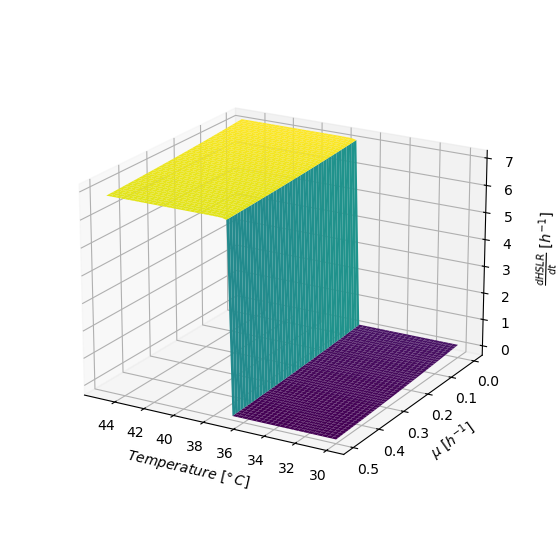

In [72]:
# Create a 3D plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_data, y_data, z_data, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel(fr'$Temperature$ $[\degree \, C]$')
ax.set_ylabel(fr'$\mu$ $[h^{{-1}}]$')
ax.set_zlabel(fr'$\frac{{dHSLR}}{{dt}}$ $[h^{{-1}}]$')

# Change the direction of x and y axes
ax.view_init(elev=20, azim=120)

# Adjust label spacing
ax.xaxis.labelpad=8
ax.yaxis.labelpad=8
ax.zaxis.labelpad=12

ax.set_box_aspect(aspect=None, zoom=0.85)

# Show plot
plt.savefig("HSLR_curve.pdf")
plt.show()